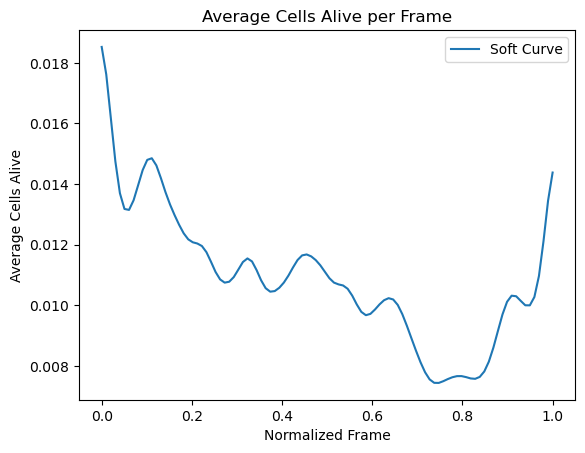

In [12]:
%run output_plotter.py

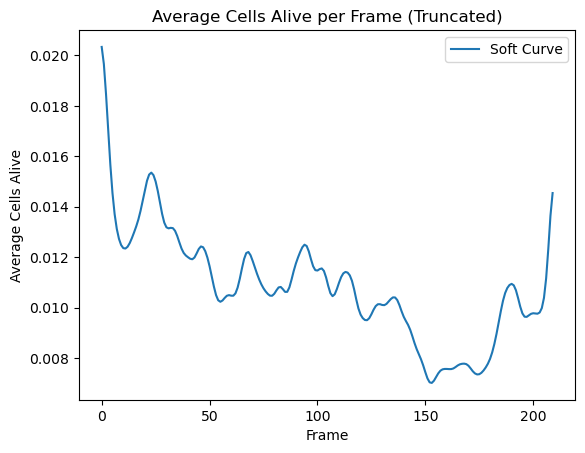

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Step 1: Read the CSV files
# Assuming the CSV files are named "output1.csv", "output2.csv", ..., "output5.csv"
file_pattern = "../GOF/conway_0.4_*.csv"
file_names = glob.glob(file_pattern)

# Step 2: Load the data from each file into a list
data = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    cells_alive = df["average_alive_cells"].values  # Replace 'your_column_name' with the actual column name
    data.append(cells_alive)

# Step 3: Truncate all datasets to the length of the shortest dataset
min_length = min(len(dataset) for dataset in data)
truncated_data = [dataset[:min_length] for dataset in data]

# Step 4: Average the truncated data across datasets
average_cells = np.mean(truncated_data, axis=0)

# Step 5: Optional: Smooth the curve
from scipy.ndimage import gaussian_filter1d
smooth_average_cells = gaussian_filter1d(average_cells, sigma=2)

# Step 6: Plot the resulting soft curve
plt.plot(range(min_length), smooth_average_cells, label='Soft Curve')
plt.xlabel('Frame')
plt.ylabel('Average Cells Alive')
plt.legend()
plt.title('Average Cells Alive per Frame (Truncated)')
plt.show()


In [14]:
%run animator.py

GIF saved as game_of_life.gif


In [5]:
import glob
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def read_csv(file_path):
    frames = []
    values = []
    with open(file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            frames.append(int(row['frame']))
            values.append(float(row['average_alive_cells']))
    return frames, values

def create_graph(file_path):
    frames, values = read_csv(file_path)
    
    # Create smooth curve
    X_Y_Spline = make_interp_spline(frames, values)
    X_ = np.linspace(min(frames), max(frames), 500)
    Y_ = X_Y_Spline(X_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(X_, Y_, label='Soft Curve')
    plt.xlabel('Frame')
    plt.ylabel('Average Cells Alive')
    plt.title(f'Average Cells Alive per Frame\n{file_path}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the graph
    output_file = file_path.rsplit('.', 1)[0] + '_graph.png'
    plt.savefig(output_file)
    plt.close()
    print(f"Graph saved as {output_file}")

def main():
    systems = ["augmented", "big1", "conway"]
    steps = ["0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8"]
    for system in systems:
        for step in steps:
            
            file_pattern = "../GOF/"+system+"_"+step+"_*.csv"
            file_names = glob.glob(file_pattern)
    
            if not file_names:
                print(f"No files found matching the pattern: {file_pattern}")
                return
    
            for file_name in file_names:
                create_graph(file_name)
    
            print(f"Processed {len(file_names)} files.")

if __name__ == "__main__":
    main()

Graph saved as ../GOF/augmented_0.2_5_graph.png
Graph saved as ../GOF/augmented_0.2_4_graph.png
Graph saved as ../GOF/augmented_0.2_6_graph.png
Graph saved as ../GOF/augmented_0.2_10_graph.png
Graph saved as ../GOF/augmented_0.2_8_graph.png
Graph saved as ../GOF/augmented_0.2_9_graph.png
Graph saved as ../GOF/augmented_0.2_2_graph.png
Graph saved as ../GOF/augmented_0.2_1_graph.png
Graph saved as ../GOF/augmented_0.2_7_graph.png
Graph saved as ../GOF/augmented_0.2_3_graph.png
Processed 10 files.
Graph saved as ../GOF/augmented_0.3_3_graph.png
Graph saved as ../GOF/augmented_0.3_6_graph.png
Graph saved as ../GOF/augmented_0.3_9_graph.png
Graph saved as ../GOF/augmented_0.3_10_graph.png
Graph saved as ../GOF/augmented_0.3_5_graph.png
Graph saved as ../GOF/augmented_0.3_7_graph.png
Graph saved as ../GOF/augmented_0.3_8_graph.png
Graph saved as ../GOF/augmented_0.3_2_graph.png
Graph saved as ../GOF/augmented_0.3_4_graph.png
Graph saved as ../GOF/augmented_0.3_1_graph.png
Processed 10 files